Current CO2 level: 427.49 ppm
Data as of: 2026-01


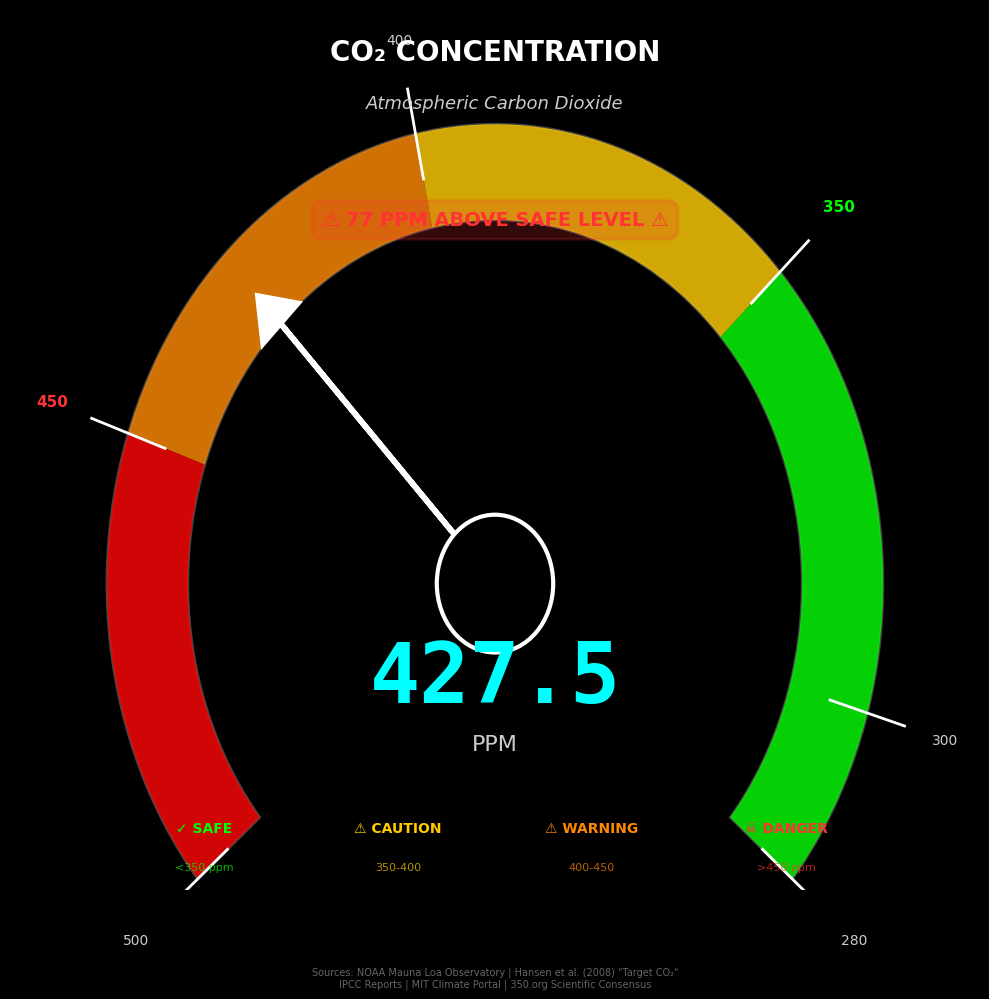

✓ CO2 RPM Tachometer saved: visualizations/co2_rpm_tachometer.png


In [20]:
# ============================================
# CO2 CONCENTRATION RPM TACHOMETER
# ============================================
"""
CO2 Concentration displayed as RPM-style tachometer gauge.

COLOR ZONE SOURCES:
- 280 ppm: Pre-industrial baseline (1750-1850)
- 350 ppm: Safe level according to Dr. James Hansen and climate scientists
  Source: Hansen et al. (2008) "Target Atmospheric CO2"
  Source: 350.org based on scientific consensus
- 400 ppm: Dangerous threshold, crossed in 2013
  Source: Yale E360, "How the World Passed a Carbon Threshold"
- 450 ppm: High risk level (50% chance of 2°C warming)
  Source: IPCC reports, OECD Environmental Outlook
- 500 ppm: Critical danger zone
  Source: Climate modeling projections

References:
1. Hansen, J. et al. (2008). "Target Atmospheric CO2: Where Should Humanity Aim?"
2. MIT Climate Portal: "What is the ideal level of carbon dioxide in the atmosphere?"
3. Sustainability Advantage: "CO2 – Why 450 ppm is Dangerous and 350 ppm is Safe"
4. Scientific American: "Climate Numerology: How Much Atmospheric CO2 Is Safe?"
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Circle
from datetime import datetime

# Load CO2 data
co2_data = pd.read_csv('data/co2_mm_mlo.csv', comment='#')
co2_data['co2_ppm'] = co2_data['average'].replace(-99.99, np.nan)
# Get current CO2 level
current_co2 = co2_data['co2_ppm'].iloc[-1]
current_date = co2_data['date'].iloc[-1] if 'date' in co2_data.columns else datetime.now().strftime('%Y-%m')

print(f"Current CO2 level: {current_co2:.2f} ppm")
print(f"Data as of: {current_date}")

# ============================================
# CREATE RPM TACHOMETER VISUALIZATION
# ============================================

fig, ax = plt.subplots(figsize=(10, 10), facecolor='#000000')
ax.set_xlim(-1.5, 1.5)
ax.set_ylim(-0.8, 1.5)
ax.axis('off')
ax.set_facecolor('#000000')

# Define color zones based on scientific thresholds
# Green: Safe zone (280-350 ppm)
# Yellow: Caution zone (350-400 ppm)  
# Orange: Warning zone (400-450 ppm)
# Red: Danger zone (450-500 ppm)

# RPM gauge spans 220 degrees (from -110° to +110°)
theta_start = -40  # Bottom left
theta_end = 220     # Bottom right

# Scale: 280 ppm to 500 ppm
co2_min = 280
co2_max = 500
co2_range = co2_max - co2_min

# Calculate angles for each zone
def co2_to_angle(co2_value):
    """Convert CO2 ppm to angle on gauge"""
    pct = (co2_value - co2_min) / co2_range
    return theta_start + pct * (theta_end - theta_start)

angle_350 = co2_to_angle(350)  # Safe limit
angle_400 = co2_to_angle(400)  # Dangerous threshold
angle_450 = co2_to_angle(450)  # High risk

# Background arc
bg_arc = Wedge((0, 0), 1.2, theta_start, theta_end, width=0.25,
               facecolor='#1a1a1a', edgecolor='#444444', linewidth=2)
ax.add_patch(bg_arc)

# Green zone: 280-350 ppm (SAFE)
safe_arc = Wedge((0, 0), 1.2, theta_start, angle_350, width=0.25,
                 facecolor='#00ff00', edgecolor='none', alpha=0.8)
ax.add_patch(safe_arc)

# Yellow zone: 350-400 ppm (CAUTION)
caution_arc = Wedge((0, 0), 1.2, angle_350, angle_400, width=0.25,
                    facecolor='#ffcc00', edgecolor='none', alpha=0.8)
ax.add_patch(caution_arc)

# Orange zone: 400-450 ppm (WARNING)
warning_arc = Wedge((0, 0), 1.2, angle_400, angle_450, width=0.25,
                    facecolor='#ff8800', edgecolor='none', alpha=0.8)
ax.add_patch(warning_arc)

# Red zone: 450-500 ppm (DANGER)
danger_arc = Wedge((0, 0), 1.2, angle_450, theta_end, width=0.25,
                   facecolor='#ff0000', edgecolor='none', alpha=0.8)
ax.add_patch(danger_arc)

# Add tick marks and labels
tick_values = [280, 300, 350, 400, 450, 500]
for co2_val in tick_values:
    angle = co2_to_angle(co2_val)
    angle_rad = np.radians(angle)
    
    # Outer tick mark
    x_outer = 1.32 * np.cos(angle_rad)
    y_outer = 1.32 * np.sin(angle_rad)
    x_inner = 1.08 * np.cos(angle_rad)
    y_inner = 1.08 * np.sin(angle_rad)
    ax.plot([x_inner, x_outer], [y_inner, y_outer], 
            color='white', linewidth=2)
    
    # Label
    x_label = 1.45 * np.cos(angle_rad)
    y_label = 1.45 * np.sin(angle_rad)
    
    if co2_val == 350:
        ax.text(x_label, y_label, str(co2_val), 
                ha='center', va='center', fontsize=11, 
                color='#00ff00', fontweight='bold')
    elif co2_val == 450:
        ax.text(x_label, y_label, str(co2_val), 
                ha='center', va='center', fontsize=11, 
                color='#ff3333', fontweight='bold')
    else:
        ax.text(x_label, y_label, str(co2_val), 
                ha='center', va='center', fontsize=10, 
                color='#cccccc')

# Needle pointing to current CO2
needle_angle = co2_to_angle(current_co2)
needle_rad = np.radians(needle_angle)
needle_x = 0.95 * np.cos(needle_rad)
needle_y = 0.95 * np.sin(needle_rad)

ax.arrow(0, 0, needle_x, needle_y, head_width=0.15, head_length=0.1,
         fc='#ffffff', ec='#ffffff', linewidth=4, zorder=10)

# Center hub
center = Circle((0, 0), 0.18, facecolor='#000000', 
                edgecolor='white', linewidth=3, zorder=11)
ax.add_patch(center)

# Digital readout - current CO2
ax.text(0, -0.25, f'{current_co2:.1f}', fontsize=60, fontweight='bold',
        color='#00ffff', ha='center', va='center', 
        family='monospace', zorder=12)
ax.text(0, -0.42, 'PPM', fontsize=16, color='#cccccc',
        ha='center', va='center')

# Title
ax.text(0, 1.35, 'CO₂ CONCENTRATION', fontsize=20,
        fontweight='bold', color='#ffffff', ha='center', va='bottom')
ax.text(0, 1.23, 'Atmospheric Carbon Dioxide', fontsize=13,
        color='#cccccc', ha='center', va='bottom', style='italic')

# Zone labels at bottom
zone_y = -0.65
ax.text(-0.9, zone_y, '✓ SAFE', fontsize=10, color='#00ff00',
        ha='center', fontweight='bold')
ax.text(-0.3, zone_y, '⚠ CAUTION', fontsize=10, color='#ffcc00',
        ha='center', fontweight='bold')
ax.text(0.3, zone_y, '⚠ WARNING', fontsize=10, color='#ff8800',
        ha='center', fontweight='bold')
ax.text(0.9, zone_y, '☠ DANGER', fontsize=10, color='#ff3333',
        ha='center', fontweight='bold')

# Threshold annotations
threshold_y = -0.75
ax.text(-0.9, threshold_y, '<350 ppm', fontsize=8, color='#00ff00',
        ha='center', alpha=0.7)
ax.text(-0.3, threshold_y, '350-400', fontsize=8, color='#ffcc00',
        ha='center', alpha=0.7)
ax.text(0.3, threshold_y, '400-450', fontsize=8, color='#ff8800',
        ha='center', alpha=0.7)
ax.text(0.9, threshold_y, '>450 ppm', fontsize=8, color='#ff3333',
        ha='center', alpha=0.7)

# Warning message if above safe level
if current_co2 > 350:
    excess = current_co2 - 350
    ax.text(0, 0.95, f'⚠ {excess:.0f} PPM ABOVE SAFE LEVEL ⚠', 
            fontsize=14, fontweight='bold', color='#ff3333',
            ha='center', va='center',
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ff3333',
                     alpha=0.2, edgecolor='#ff3333', linewidth=2))

# Sources
sources_text = 'Sources: NOAA Mauna Loa Observatory | Hansen et al. (2008) "Target CO₂"\nIPCC Reports | MIT Climate Portal | 350.org Scientific Consensus'
ax.text(0, -1.0, sources_text, fontsize=7, color='#666666',
        ha='center', va='top', multialignment='center')

plt.tight_layout()
#plt.savefig('visualizations/co2_rpm_tachometer.png', dpi=300,
 #           bbox_inches='tight', facecolor='#000000', edgecolor='none')
plt.show()

print("✓ CO2 RPM Tachometer saved: visualizations/co2_rpm_tachometer.png")